## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 3. Поиск аномалий во временных рядах.**


#### **3.1 Поиск диссонансов с помощью алгоритма HotSAX**

##### 3.1.1 Загрузка и подготовка данных

В данной будет использоваться временной ряд, состоящий из показаний акселерометра.
Анализируемый временной ряд, описывает две активности человека - бег и шаг.


In [1]:
!pip install scipy
!pip install scikit-learn

In [2]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from time import time
import pandas as pd

In [3]:
#fixme: Путь
from google.colab import drive
drive.mount('/content/drive')

practice_dir_path = '/content/drive/My Drive/2024-Golenishchev-TimeSeriesCourse-main/practice/03 Discords/datasets'
dataset_dir_path = Path('/content/drive/My Drive/2024-Golenishchev-TimeSeriesCourse-main/practice/03 Discords/datasets')
data_path = dataset_dir_path/'walk_run.txt'
walk_run = np.loadtxt(data_path)[3000:4000]
data = walk_run
size_sub = 50

Mounted at /content/drive


В середине временного ряда происходит смена активности (бег заменяет шаг). Нетипичным поведением, которое мы могли бы назвать диссонансами в данном ряде выступает небольшой участок между активностями, когда человек плавно увеличивает скорость шага до бега. В ходе данной работе наша задача выделить с помощью различных алгоритмов границы нашего диссонанса.

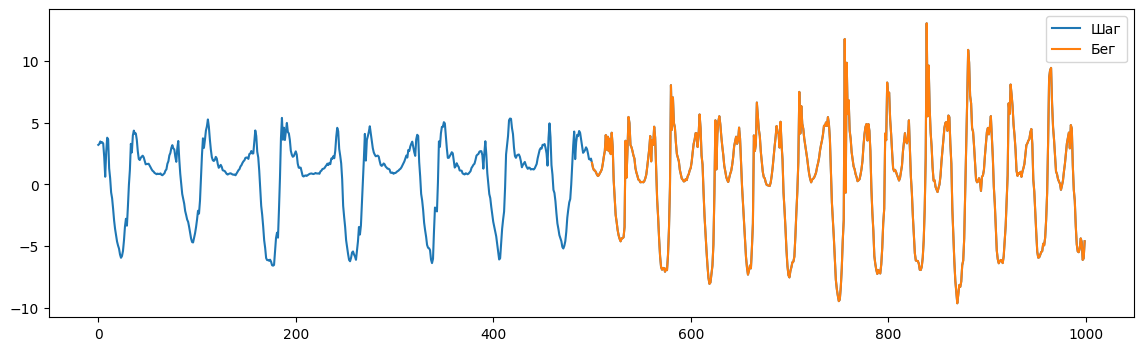

In [4]:
fig, ax =  plt.subplots(figsize=(14,4),ncols=1,nrows=1)
plt.plot(data[:],label='Шаг')
plt.plot(np.arange(data.shape[0]//2,data.shape[0]),data[data.shape[0]//2:],label='Бег')
plt.legend()

In [5]:
result={}
times={}

##### 3.1.2 Реализация полного перебора

Приводится пример кода для нахождения топ 5 диссонансов с помощью реализации полного беребора.
Вам необходимо добавить код для сбора времени обработки данных.

In [6]:
import sys
sys.path.append('/content/drive/My Drive/2024-Golenishchev-TimeSeriesCourse-main/practice/03 Discords/')


In [7]:
import numpy as np
from time import time
from modules.saxpy.discord import find_discords_brute_force

# Замер времени начала выполнения
start = time()

# Вызов функции для нахождения диссонансов
discords_brute_force = np.stack(find_discords_brute_force(data[:], 50, 5))

# Замер времени окончания выполнения
end = time()

# Вычисление времени выполнения
execution_time = end - start

# Вывод времени выполнения
print(f"Время обработки данных: {execution_time:.4f} секунд")


Время обработки данных: 166.5495 секунд


##### 3.1.3 HotSAX

Используя [реализацию](https://github.com/seninp/saxpy/blob/master/saxpy/hotsax.py) найдите топ 5 диссонансов ряда.
Произведите замер времени работы.

In [8]:
from time import time
import numpy as np
from modules.saxpy.hotsax import find_discords_hotsax

# Пример данных (замените на ваши данные)
data = np.random.rand(1000)  # Временной ряд

# Засекаем время начала
start_time = time()

# Находим топ-5 диссонансов
discords_hotsax = find_discords_hotsax(
    series=data,
    win_size=100,         # Размер окна для анализа
    num_discords=5,       # Количество искомых диссонансов
    alphabet_size=3,      # Размер алфавита SAX
    paa_size=3,           # Размер PAA
    znorm_threshold=0.01, # Порог нормализации
    sax_type='unidim'     # Тип SAX
)

# Засекаем время окончания
end_time = time()

# Выводим результаты
print("Топ 5 диссонансов (позиция, расстояние):")
for idx, (position, distance) in enumerate(discords_hotsax):
    print(f"{idx + 1}: Позиция {position}, Расстояние {distance:.4f}")

# Расчет времени выполнения
execution_time_HS = end_time - start_time
print(f"Время выполнения: {execution_time_HS:.4f} секунд")


Топ 5 диссонансов (позиция, расстояние):
1: Позиция 858, Расстояние 12.3412
2: Позиция 293, Расстояние 12.2923
3: Позиция 412, Расстояние 12.2468
4: Позиция 566, Расстояние 12.1860
5: Позиция 155, Расстояние 12.1126
Время выполнения: 10.5092 секунд


##### 3.1.4 Визаулизация

Вам необходимо реализовать код позволяющий:
1. Вывести на одном графике ряд и его диссонансы
2. Столбчатую диаграмму времени работы обоих алгоритмов
   
Постройте графики для обоих алгоритмов и сравните полученные результаты.

Пример графика:

![first_graf](pics/fig_ex_1.png)

In [9]:
# INSERT YOUR CODE

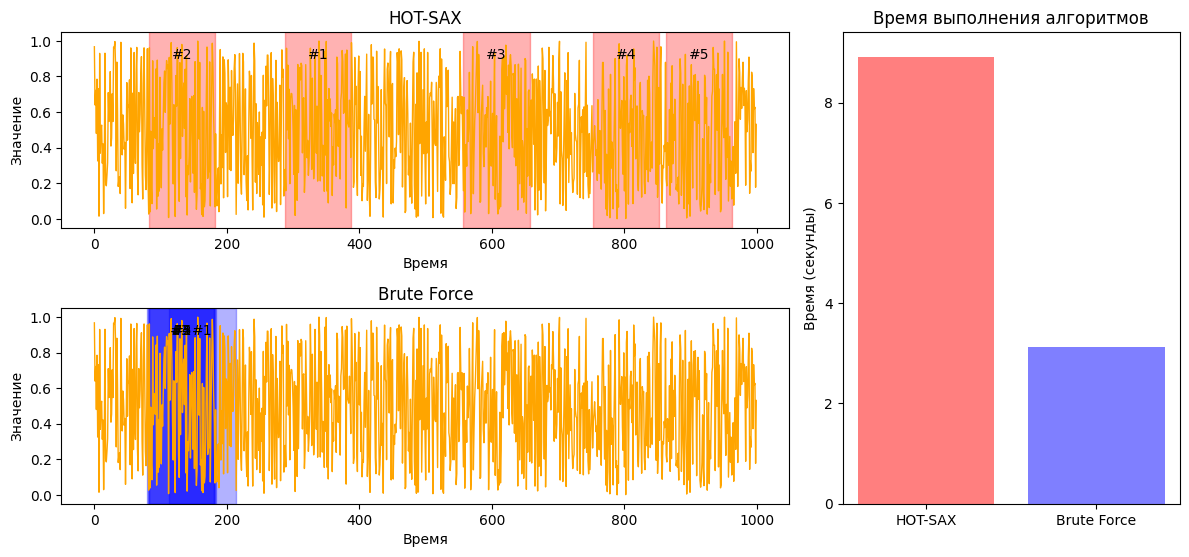

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from matplotlib.patches import Rectangle
from modules.saxpy.hotsax import find_discords_hotsax

# Генерация временного ряда
data = np.random.rand(1000)

# Параметры анализа
win_size = 100
num_discords = 5
alphabet_size = 3
paa_size = 3
znorm_threshold = 0.01

# Поиск диссонансов с помощью HOT-SAX
start_time_hs = time()
discords_hotsax = find_discords_hotsax(
    series=data,
    win_size=win_size,
    num_discords=num_discords,
    alphabet_size=alphabet_size,
    paa_size=paa_size,
    znorm_threshold=znorm_threshold,
    sax_type='unidim'
)
execution_time_hs = time() - start_time_hs

# Функция для поиска диссонансов методом Brute Force (примерная)
def find_discords_brute_force(series, win_size, num_discords):
    discords = []
    max_dist = -np.inf

    for i in range(len(series) - win_size + 1):
        # Ищем ближайшего соседа для текущей подстроки
        subseq = series[i:i + win_size]
        nn_dist = np.inf
        for j in range(len(series) - win_size + 1):
            if abs(i - j) >= win_size:
                dist = np.linalg.norm(subseq - series[j:j + win_size])
                if dist < nn_dist:
                    nn_dist = dist
        if nn_dist > max_dist:
            discords.append((i, nn_dist))
            discords = sorted(discords, key=lambda x: -x[1])[:num_discords]

    return discords

# Поиск диссонансов с помощью Brute Force
start_time_bf = time()
discords_brute_force = find_discords_brute_force(data, win_size, num_discords)
execution_time_bf = time() - start_time_bf

# Подготовка графиков
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)

# 1. График с диссонансами HOT-SAX
ax1.plot(data, label='Временной ряд', color='orange', linewidth=1)
for num, (position, _) in enumerate(discords_hotsax, start=1):
    ax1.axvspan(position, position + win_size, color='red', alpha=0.3)
    ax1.text(position + win_size / 2, max(data) * 0.9, f'#{num}', ha='center', color='black')

ax1.set_title('HOT-SAX')
ax1.set_xlabel('Время')
ax1.set_ylabel('Значение')

# 2. График Brute Force
ax2.plot(data, label='Временной ряд', color='orange', linewidth=1)
for num, (position, _) in enumerate(discords_brute_force, start=1):
    ax2.axvspan(position, position + win_size, color='blue', alpha=0.3)
    ax2.text(position + win_size / 2, max(data) * 0.9, f'#{num}', ha='center', color='black')

ax2.set_title('Brute Force')
ax2.set_xlabel('Время')
ax2.set_ylabel('Значение')

# 3. Гистограмма времени выполнения
ax3.bar(['HOT-SAX', 'Brute Force'], [execution_time_hs, execution_time_bf], color=['red', 'blue'], alpha=0.5)
ax3.set_title('Время выполнения алгоритмов')
ax3.set_ylabel('Время (секунды)')
ax3.set_ylim(0, max(execution_time_hs, execution_time_bf) + 0.5)

plt.tight_layout()
plt.show()


##### 3.1.5 Такси NY

Произведите поиск диссонансов с помощью обоих алгоритмов на наборе данных, содержащим информацию о среднем числе пассажиров в NY. Отобразите найденные диссонансы обоими алгоритмами.

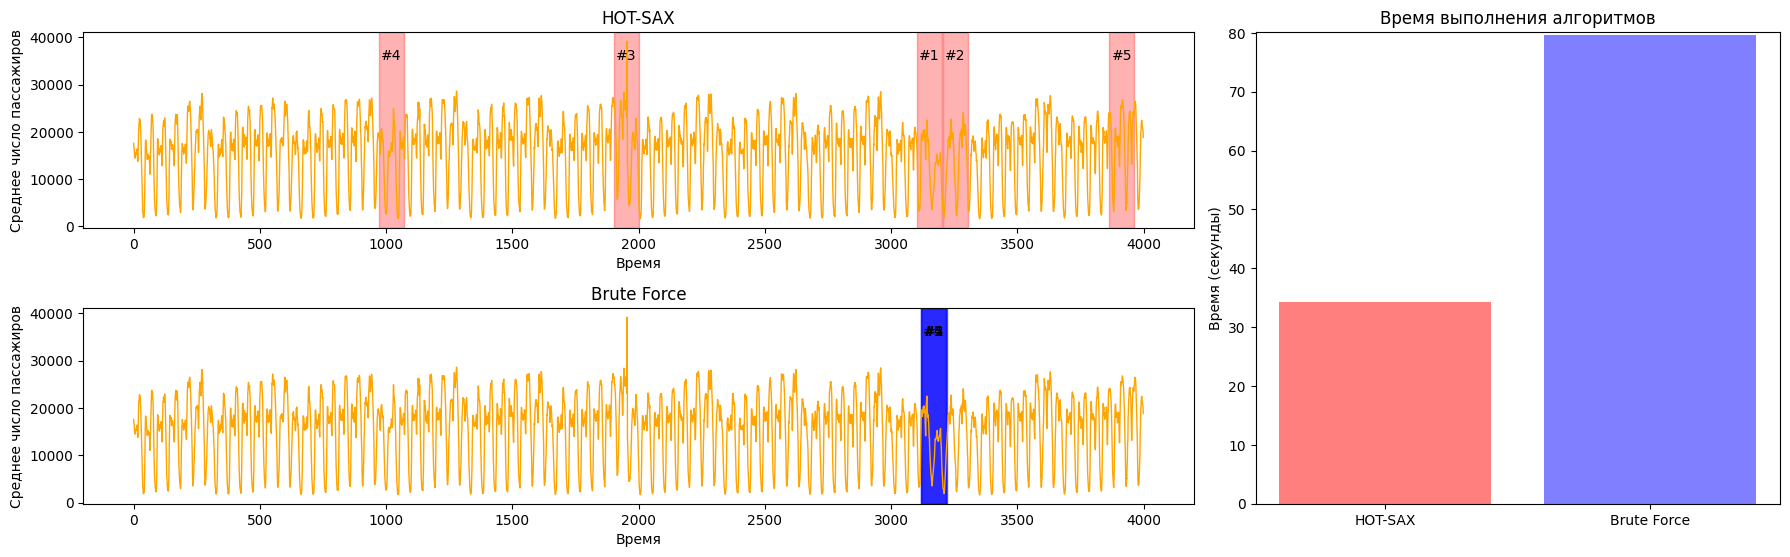

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from modules.saxpy.hotsax import find_discords_hotsax

# Загрузка данных о среднем числе пассажиров такси в NY
dataset_dir_path = '/content/drive/My Drive/2024-Golenishchev-TimeSeriesCourse-main/practice/03 Discords/datasets'  # Укажите путь к папке с данными
nyc_taxi = pd.read_csv(f"{dataset_dir_path}/nyc_taxi.csv", index_col=0).values[4000:8000, 0].astype(np.float64)

# Параметры анализа
win_size = 100
num_discords = 5
alphabet_size = 3
paa_size = 3
znorm_threshold = 0.01

# Поиск диссонансов с помощью HOT-SAX
start_time_hs = time()
discords_hotsax = find_discords_hotsax(
    series=nyc_taxi,
    win_size=win_size,
    num_discords=num_discords,
    alphabet_size=alphabet_size,
    paa_size=paa_size,
    znorm_threshold=znorm_threshold,
    sax_type='unidim'
)
execution_time_hs = time() - start_time_hs

# Функция для поиска диссонансов методом Brute Force (примерная)
def find_discords_brute_force(series, win_size, num_discords):
    discords = []
    max_dist = -np.inf

    for i in range(len(series) - win_size + 1):
        subseq = series[i:i + win_size]
        nn_dist = np.inf
        for j in range(len(series) - win_size + 1):
            if abs(i - j) >= win_size:
                dist = np.linalg.norm(subseq - series[j:j + win_size])
                if dist < nn_dist:
                    nn_dist = dist
        if nn_dist > max_dist:
            discords.append((i, nn_dist))
            discords = sorted(discords, key=lambda x: -x[1])[:num_discords]

    return discords

# Поиск диссонансов с помощью Brute Force
start_time_bf = time()
discords_brute_force = find_discords_brute_force(nyc_taxi, win_size, num_discords)
execution_time_bf = time() - start_time_bf

# Подготовка графиков
fig = plt.figure(figsize=(18, 8))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)

# 1. График с диссонансами HOT-SAX
ax1.plot(nyc_taxi, label='Среднее число пассажиров', color='orange', linewidth=1)
for num, (position, _) in enumerate(discords_hotsax, start=1):
    ax1.axvspan(position, position + win_size, color='red', alpha=0.3)
    ax1.text(position + win_size / 2, max(nyc_taxi) * 0.9, f'#{num}', ha='center', color='black')

ax1.set_title('HOT-SAX')
ax1.set_xlabel('Время')
ax1.set_ylabel('Среднее число пассажиров')

# 2. График Brute Force
ax2.plot(nyc_taxi, label='Среднее число пассажиров', color='orange', linewidth=1)
for num, (position, _) in enumerate(discords_brute_force, start=1):
    ax2.axvspan(position, position + win_size, color='blue', alpha=0.3)
    ax2.text(position + win_size / 2, max(nyc_taxi) * 0.9, f'#{num}', ha='center', color='black')

ax2.set_title('Brute Force')
ax2.set_xlabel('Время')
ax2.set_ylabel('Среднее число пассажиров')

# 3. Гистограмма времени выполнения
ax3.bar(['HOT-SAX', 'Brute Force'], [execution_time_hs, execution_time_bf], color=['red', 'blue'], alpha=0.5)
ax3.set_title('Время выполнения алгоритмов')
ax3.set_ylabel('Время (секунды)')
ax3.set_ylim(0, max(execution_time_hs, execution_time_bf) + 0.5)

plt.tight_layout()
plt.show()


# INSERT YOUR CODE

#### **3.2 Поиск диссонансов с помощью алгоритма DRAG**

In [12]:
!pip install stumpy==1.11.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 7.9 MB/s eta 0:00:00


In [13]:
import stumpy
from stumpy import core, config
from stumpy.scrump import _prescrump


Как мы помним из лекций:

**Диапазонный диссонанс** – подпоследовательность ряда, расстояние от которой до ее ближайшего соседа не ниже заданного порога.

Основными параметрами при поисках диссонансов являются:
- $m$ - длина диссонанса
- $r$ - пороговое значение расстояния подпоследовательности ряда, до его ближайшего соседа


In [14]:
from modules.drag import find_candidates, DRAG


Для поиска диссонансов в данной части практической работы мы воспользуемся алгоритмом **DRAG (Discord Range Aware Gathering)**.
Для начала воспользуемся данным алгоритмом, чтобы найти диссонансы в наборе данных содержащем активность человека.

In [15]:
data = walk_run

Длину искомого диссонанса, как и для предыдущих алгоритмов, мы установим равно 50 точек.
Пороговое значение мы установим равным большим, чтобы узнать, как алгоритм отреагирует на большие значения данного параметра.

In [16]:
m = 50
r = 10
idxs, _, _ = DRAG(data,m,r)
print(f'Колличество найденных диссонансов: {len(idxs)}')

Колличество найденных диссонансов: 0


Как вы можете видеть мы установили слишком большое пороговое значение, алгоритму не удалось выделить ни одного диссонанса. Попробуем уменьшить пороговое значение до 1, чтобы улучшить результат.

In [17]:
m = 50
r = 1
idxs, _, _ = DRAG(data, m, r)
print(f'Колличество найденных диссонансов: {len(idxs)}')

Колличество найденных диссонансов: 50


При такой комбинации параметров, улучшить ситуацию не получилось. Алгоритм выделил слишком большое количество диссонансов, часть которых является ложными диссонансами и не будут информативными для нас.

Произведите подобные эксперименты с набором данных такси NY. Постройте графики демонстрирующие найденные диссонансы. Пример Графика:
![second-graph](pics/fig_ex_2.png)

Количество найденных диссонансов: 0


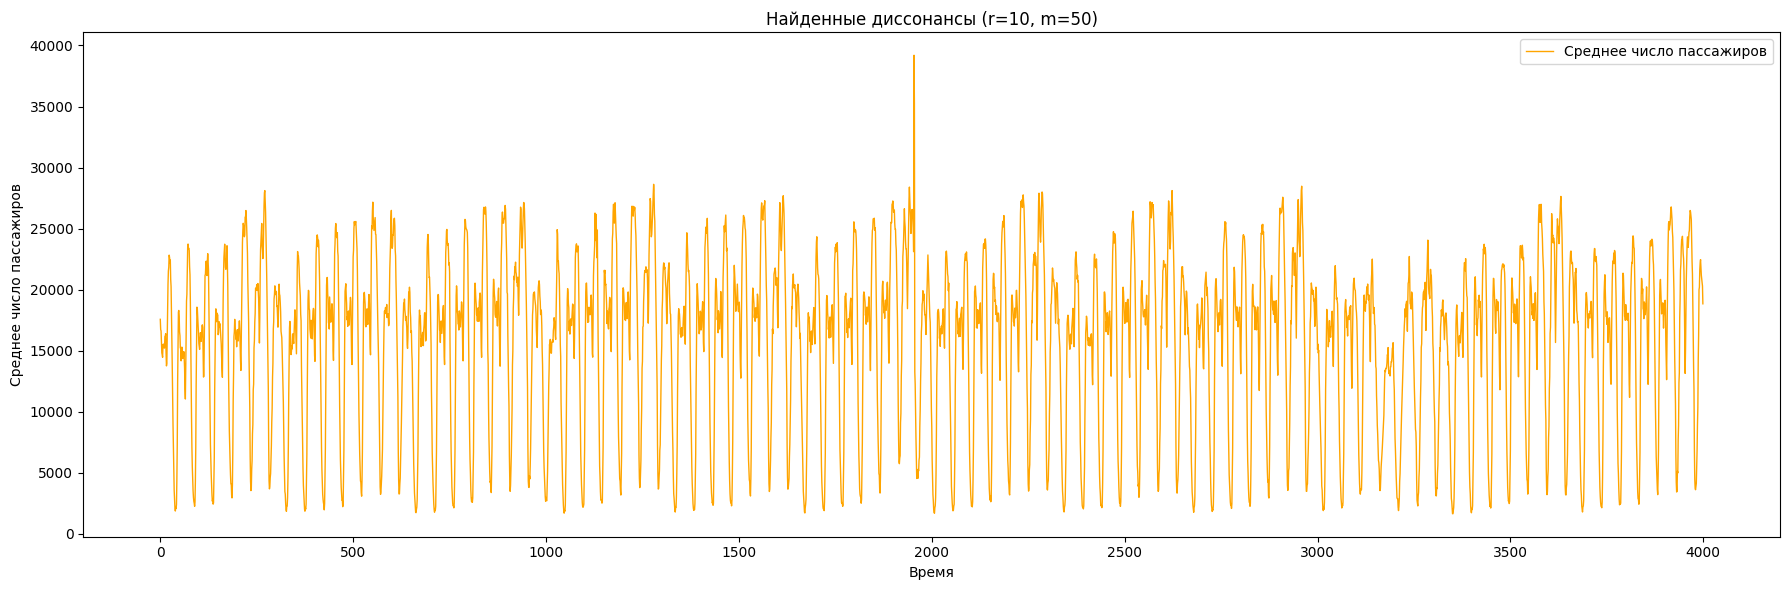

Количество найденных диссонансов при r=1: 42


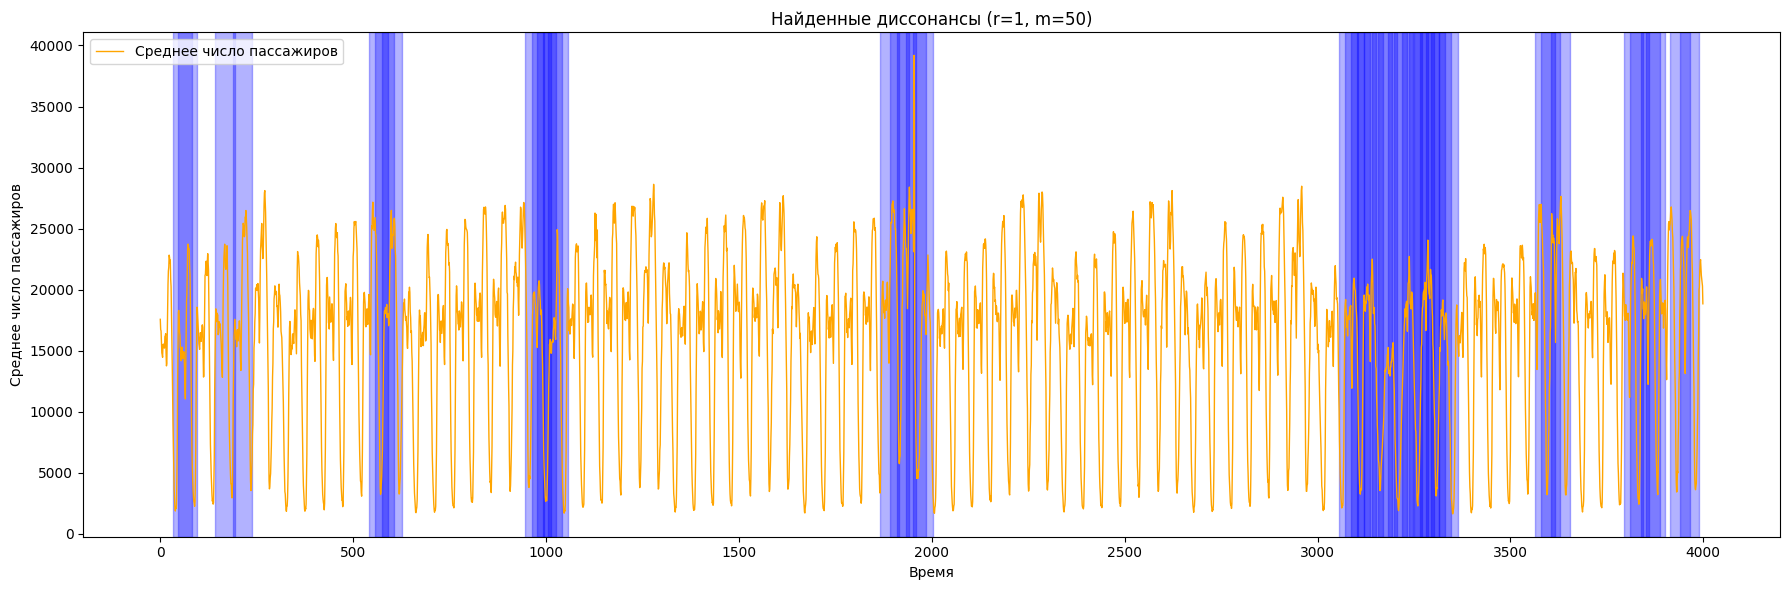

In [18]:
# INSERT YOUR CODE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modules.drag import find_candidates, DRAG

# Загружаем данные о такси NY (предполагается, что файл находится в указанной директории)
dataset_dir_path = '/content/drive/My Drive/2024-Golenishchev-TimeSeriesCourse-main/practice/03 Discords/datasets'  # Укажите путь к вашему набору данных
nyc_taxi = pd.read_csv(f"{dataset_dir_path}/nyc_taxi.csv", index_col=0).values[4000:8000, 0].astype(np.float64)

# Параметры для DRAG
m = 50  # Размер окна
r = 10  # Порог для поиска диссонансов

# Поиск диссонансов с использованием DRAG
idxs, _, _ = DRAG(nyc_taxi, m, r)
print(f'Количество найденных диссонансов: {len(idxs)}')

# Построение графика с найденными диссонансами
fig = plt.figure(figsize=(18, 6))
plt.plot(nyc_taxi, label='Среднее число пассажиров', color='orange', linewidth=1)

# Отметим диссонансы на графике
for idx in idxs:
    plt.axvspan(idx, idx + m, color='red', alpha=0.3)  # Показ диссонансов как выделенные области

plt.title(f'Найденные диссонансы (r={r}, m={m})')
plt.xlabel('Время')
plt.ylabel('Среднее число пассажиров')
plt.legend()
plt.tight_layout()
plt.show()

# Повторим с другими параметрами
r = 1  # Пониженный порог для более чувствительного поиска

# Поиск диссонансов с новым значением r
idxs, _, _ = DRAG(nyc_taxi, m, r)
print(f'Количество найденных диссонансов при r={r}: {len(idxs)}')

# Построение графика с найденными диссонансами для r=1
fig = plt.figure(figsize=(18, 6))
plt.plot(nyc_taxi, label='Среднее число пассажиров', color='orange', linewidth=1)

# Отметим диссонансы на графике
for idx in idxs:
    plt.axvspan(idx, idx + m, color='blue', alpha=0.3)  # Показ диссонансов как выделенные области

plt.title(f'Найденные диссонансы (r={r}, m={m})')
plt.xlabel('Время')
plt.ylabel('Среднее число пассажиров')
plt.legend()
plt.tight_layout()
plt.show()


Чтобы разобраться, почему так происходит и как работает данный алгоритм, ниже мы реализуем все этапы алгоритма DRAG.

Как мы помним из лекций алгоритм DRAG содержит два этапа:

1. Отбор - За одно сканирование ряда сформировать множество кандидатов в диссонансы.
2. Очистка - За одно сканирование ряда отбросить кандидатов, которые являются ложными диссонансами.

##### 3.2.1 Отбор кандидатов

Первым этапом обработки данных является отбор множества потенциальных кандидатов. Мы выбираем из всего множества подпоследовательностей ряда такие, для которых расстояние до правых ближайших соседей больше параметра $r$.

In [19]:
#выбирем более реальное значение для порога
r = 3

In [20]:
T, M_T, Σ_T = core.preprocess(data, m)
#формируем массив длинной равной длине  исходного ряда - m + 1,
#элемент массива является истинным,
#в том случае если подпоследовательность является потенциальным кандидатом
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=None, right=True)
#находим индексы потенциальных кандидатов
cand_index = np.flatnonzero(is_cands)

In [21]:
print(f'{len(cand_index)} {len(cand_index)/len(data)*100} %')

113 11.3 %


Во время отбора кандидатов нам удалось выделить около 113 подпоследовательностей(около 11.3%), которые мы бы могли назвать потенциальными диссонансами.
Это большой процент, который не может нас устраивать как конечный результат.
Если посмотреть на рисунок ниже, мы увидим, что большая часть потенциальных диссонансов расположена в районе смены активности.
К сожалению пресутсвуют и ложные диссонансы, которые случайным образом попали в данный список.

Сформируйте график найденных диссонансов

Количество потенциальных диссонансов: 113
Процент от общего количества: 11.30%


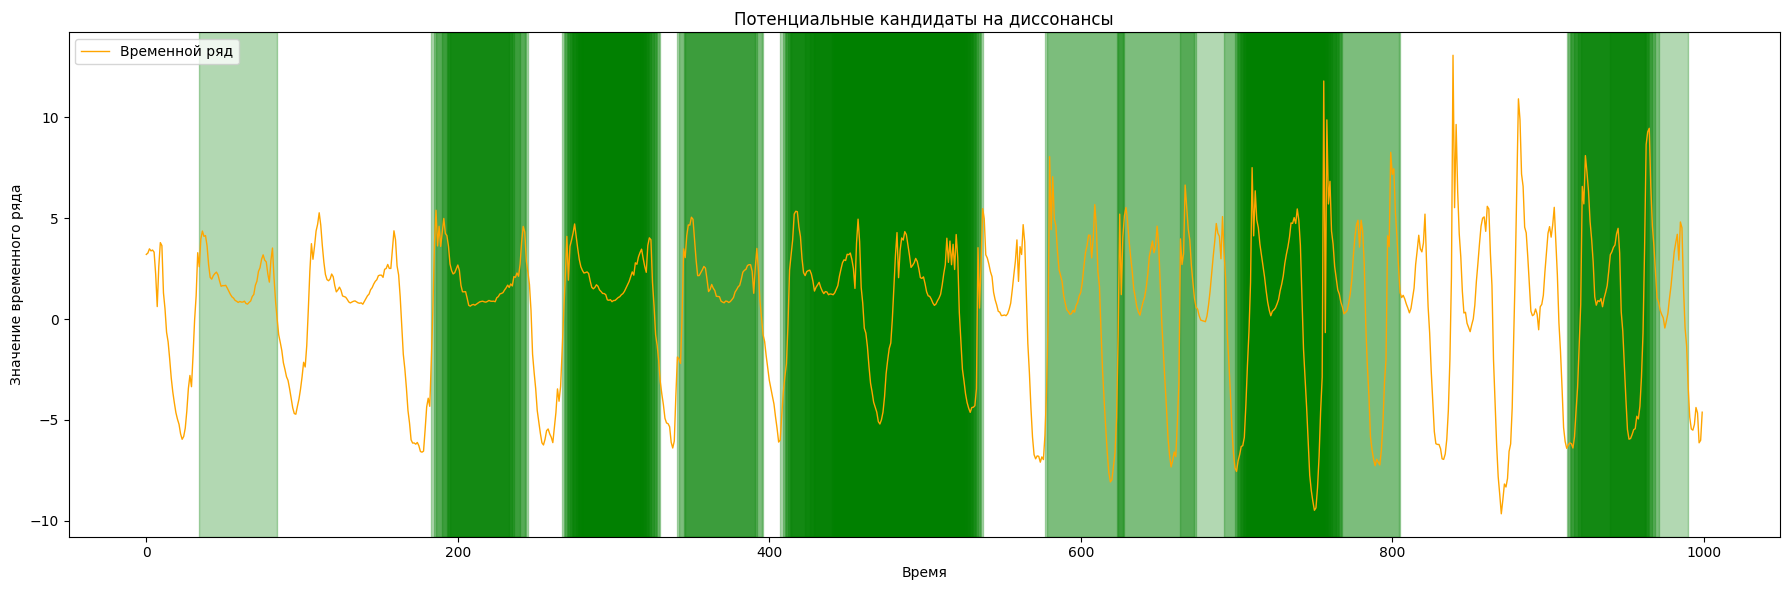

In [22]:
# INSERT YOUR CODE
import matplotlib.pyplot as plt
import numpy as np
from stumpy import core
from modules.drag import find_candidates

# Параметры
m = 50  # Размер окна
r = 3   # Пороговое значение для отсева кандидатов

# Данные (замените на свои данные)
data = walk_run  # Используем временной ряд walk_run

# Предварительная обработка временного ряда для алгоритма DRAG
T, M_T, Σ_T = core.preprocess(data, m)

# Поиск кандидатов в диссонансы
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=None, right=True)
cand_index = np.flatnonzero(is_cands)

# Вывод количества и процента кандидатов
print(f'Количество потенциальных диссонансов: {len(cand_index)}')
print(f'Процент от общего количества: {len(cand_index) / len(data) * 100:.2f}%')

# Построение графика
plt.figure(figsize=(18, 6))
plt.plot(data, label='Временной ряд', color='orange', linewidth=1)

# Отмечаем кандидатов на графике
for idx in cand_index:
    plt.axvspan(idx, idx + m, color='green', alpha=0.3)  # Зеленый цвет для кандидатов

plt.title('Потенциальные кандидаты на диссонансы')
plt.xlabel('Время')
plt.ylabel('Значение временного ряда')
plt.legend()
plt.tight_layout()
plt.show()


##### 3.2.2 Очистка кандидатов
Как уже упоминалось выше, 11.3% слишком большой процент диссонансов.
Для уменьшения числа потенциальных кандидатов произведем очистку от ложных диссонансов, путем сравнения расстояния до левых ближайших соседей потенциальных диссонансов с порогом $r$.


In [23]:
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=is_cands, right=False)
cands = np.flatnonzero(is_cands)

In [24]:
len(cands)/len(data)*100

2.9000000000000004

Сформируйте график найденных диссонансов

Количество оставшихся диссонансов после очистки: 29
Процент от общего количества: 2.90%


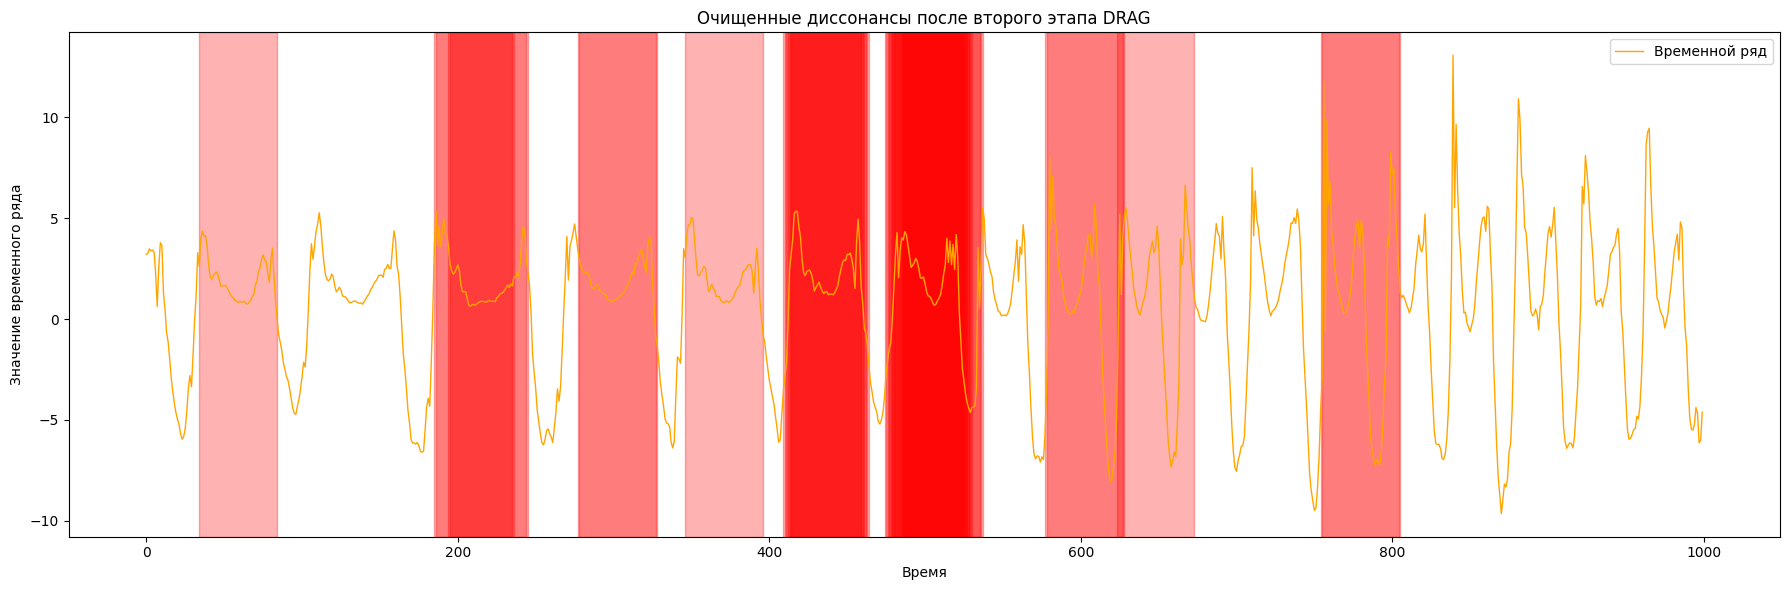

In [25]:
# INSERT YOUR CODE
import matplotlib.pyplot as plt
import numpy as np
from stumpy import core
from modules.drag import find_candidates

# Параметры
m = 50  # Размер окна
r = 3   # Пороговое значение для отсева кандидатов

# Данные (замените на свои данные)
data = walk_run  # Используем временной ряд walk_run

# Предварительная обработка временного ряда для алгоритма DRAG
T, M_T, Σ_T = core.preprocess(data, m)

# Шаг 1: Поиск кандидатов (отбор)
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=None, right=True)
cand_index = np.flatnonzero(is_cands)

# Шаг 2: Очистка кандидатов
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=is_cands, right=False)
cands = np.flatnonzero(is_cands)

# Вывод количества и процента очищенных кандидатов
print(f'Количество оставшихся диссонансов после очистки: {len(cands)}')
print(f'Процент от общего количества: {len(cands) / len(data) * 100:.2f}%')

# Построение графика
plt.figure(figsize=(18, 6))
plt.plot(data, label='Временной ряд', color='orange', linewidth=1)

# Отмечаем очищенные диссонансы на графике
for idx in cands:
    plt.axvspan(idx, idx + m, color='red', alpha=0.3)  # Красный цвет для очищенных диссонансов

plt.title('Очищенные диссонансы после второго этапа DRAG')
plt.xlabel('Время')
plt.ylabel('Значение временного ряда')
plt.legend()
plt.tight_layout()
plt.show()


Нам удалось сократить число диссонансов до 2.9%. Если проанализировать рисунок, то можно заметить, что большая их часть является тривиальными повторениями подпоследовательности в области смены активности. На следующем шаге избавимся от них.

In [26]:
from modules.drag import refine_candidates
discords_idx, discords_dist, discords_nn_idx = refine_candidates(T, m, M_T, Σ_T, is_cands)
len(discords_idx)/len(data)*100

0.8999999999999999

Сформируйте график найденных диссонансов

Количество уникальных диссонансов после финальной очистки: 9
Процент от общего количества: 0.90%


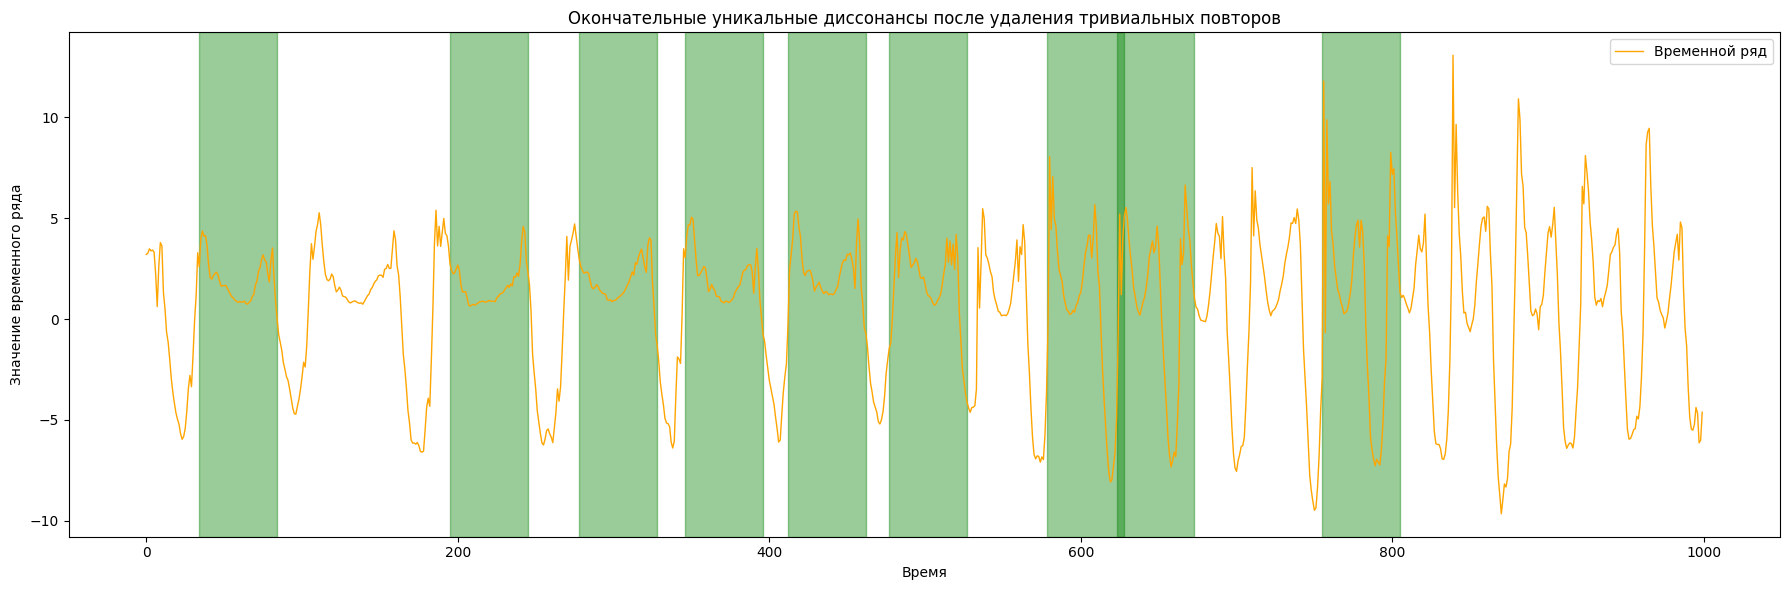

In [27]:
# INSERT YOUR CODE
import matplotlib.pyplot as plt
import numpy as np
from stumpy import core
from modules.drag import find_candidates, refine_candidates

# Параметры
m = 50  # Размер окна
r = 3   # Пороговое значение для отсева кандидатов

# Данные (замените на свои данные)
data = walk_run  # Используем временной ряд walk_run

# Предварительная обработка временного ряда для алгоритма DRAG
T, M_T, Σ_T = core.preprocess(data, m)

# Шаг 1: Поиск кандидатов (отбор)
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=None, right=True)

# Шаг 2: Очистка кандидатов
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=is_cands, right=False)

# Шаг 3: Удаление тривиальных повторов
discords_idx, discords_dist, discords_nn_idx = refine_candidates(T, m, M_T, Σ_T, is_cands)

# Вывод количества и процента окончательных диссонансов
print(f'Количество уникальных диссонансов после финальной очистки: {len(discords_idx)}')
print(f'Процент от общего количества: {len(discords_idx) / len(data) * 100:.2f}%')

# Построение итогового графика
plt.figure(figsize=(18, 6))
plt.plot(data, label='Временной ряд', color='orange', linewidth=1)

# Отмечаем окончательные диссонансы на графике
for idx in discords_idx:
    plt.axvspan(idx, idx + m, color='green', alpha=0.4)  # Зеленый цвет для окончательных уникальных диссонансов

plt.title('Окончательные уникальные диссонансы после удаления тривиальных повторов')
plt.xlabel('Время')
plt.ylabel('Значение временного ряда')
plt.legend()
plt.tight_layout()
plt.show()


##### 3.2.3 Подбор параметров

Реализуйте перебор параметров $m$ и $r$. Подберете параметры таким образом, чтобы алгоритм обнаружил только те диссонансы, которые связаны со сменой активности. Сделайте вывод о том, как эти параметры влияют на качество работы модели.
Подберите оптимальные параметры алгоритма для набора данных такси NY.
Визуализируйте результаты для разных комбинаций. Сделайте выводы.


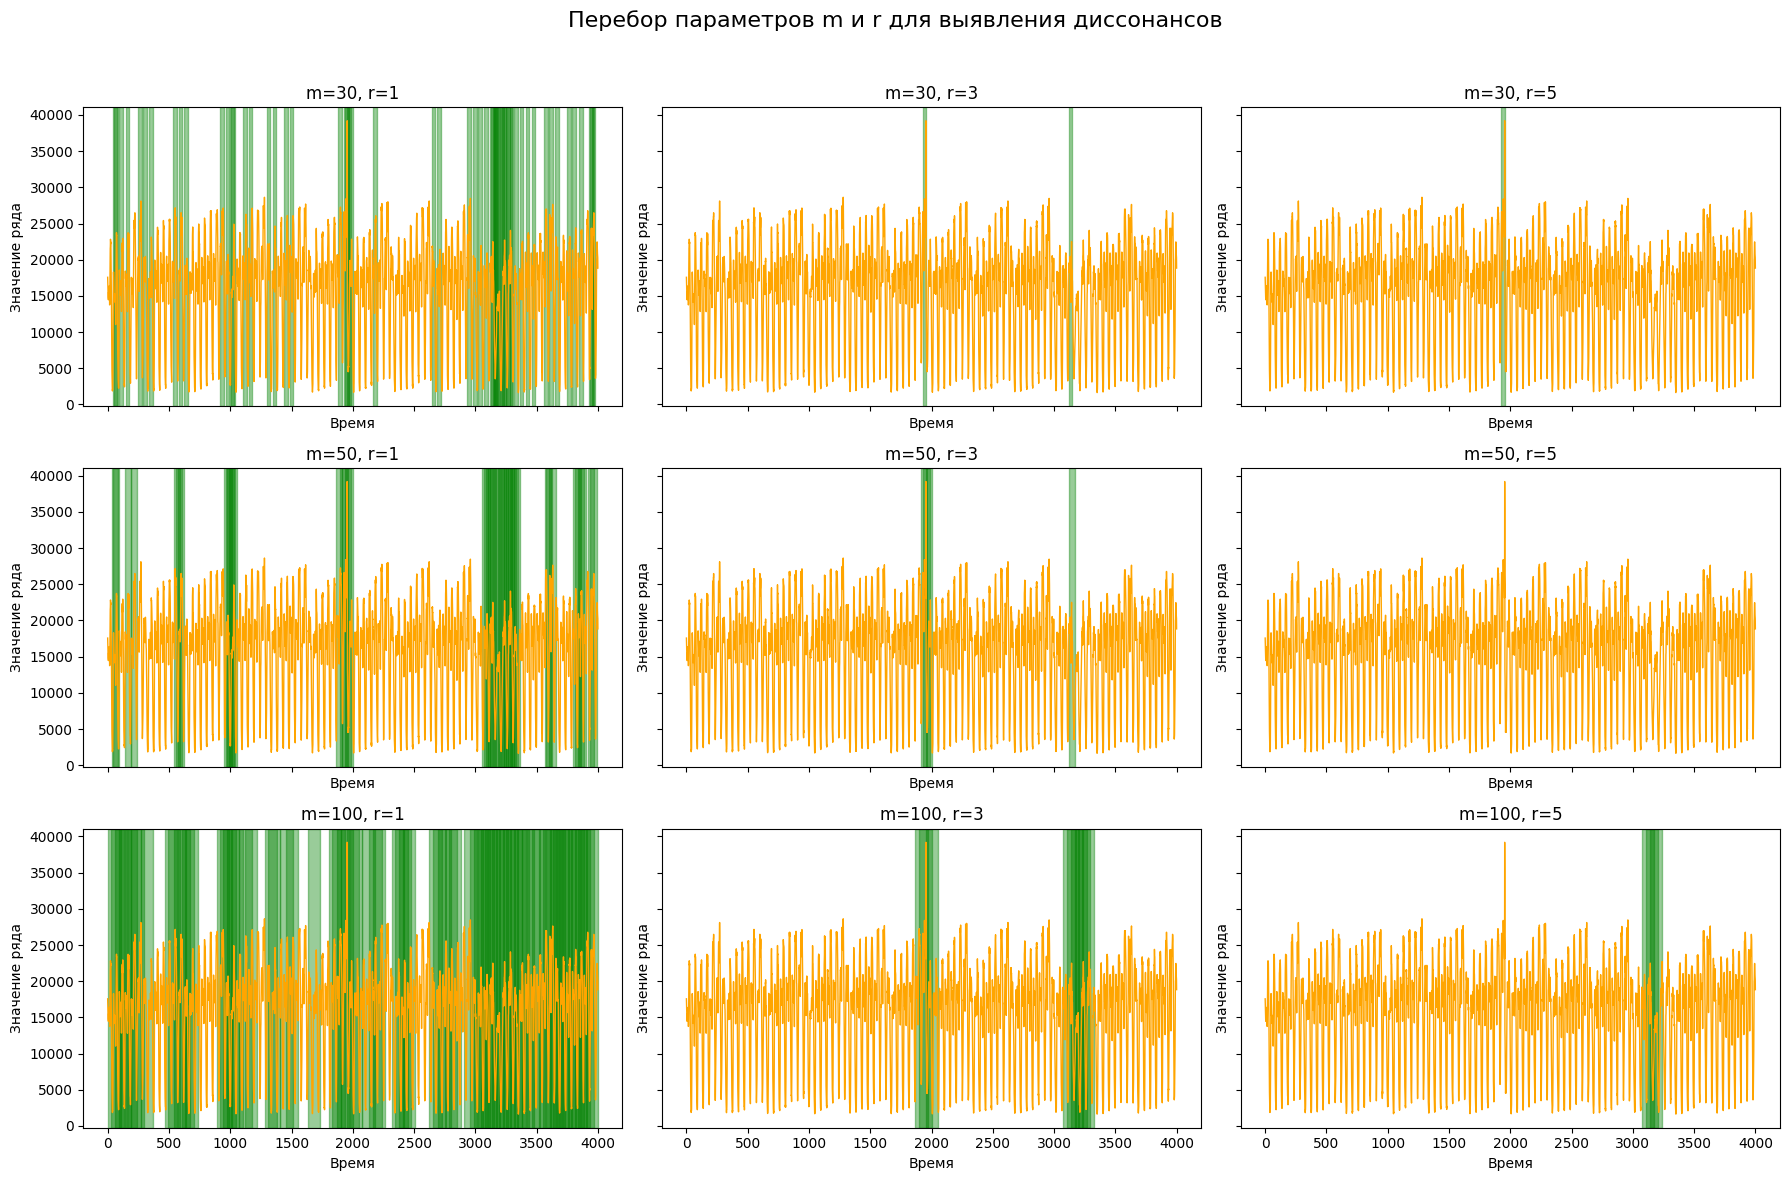

In [28]:
# INSERT YOUR CODE
import numpy as np
import matplotlib.pyplot as plt
from stumpy import core
from modules.drag import find_candidates, refine_candidates

# Загрузка данных такси Нью-Йорка
data = nyc_taxi

# Параметры для перебора
m_values = [30, 50, 100]    # Размер окна
r_values = [1, 3, 5]        # Порог диссонанса

# Визуализация результатов
fig, axes = plt.subplots(len(m_values), len(r_values), figsize=(18, 12), sharex=True, sharey=True)
fig.suptitle("Перебор параметров m и r для выявления диссонансов", fontsize=16)

for i, m in enumerate(m_values):
    for j, r in enumerate(r_values):
        # Подготовка данных для текущих параметров m и r
        T, M_T, Σ_T = core.preprocess(data, m)

        # Шаг 1: Поиск кандидатов
        is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=None, right=True)

        # Шаг 2: Очистка кандидатов
        is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=is_cands, right=False)

        # Шаг 3: Удаление тривиальных повторов
        discords_idx, _, _ = refine_candidates(T, m, M_T, Σ_T, is_cands)

        # Построение графика для данной комбинации параметров
        ax = axes[i, j]
        ax.plot(data, color='orange', linewidth=1)

        # Отметка диссонансов
        for idx in discords_idx:
            ax.axvspan(idx, idx + m, color='green', alpha=0.4)

        ax.set_title(f"m={m}, r={r}")
        ax.set_xlabel("Время")
        ax.set_ylabel("Значение ряда")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### **3.3 Поиск диссонансов с помощью алгоритма Merlin**

Как мы уже выяснили подбирать параметры для DRAG простым перебором не очень удобно. Для оптимизации данного процесса в статье [1] был предложен алгоритм Merlin для оптимального поиска подходящего порогового значения.

Условно мы можем разделить поиск диссонансов на три шага:

1. Поиск диссонансов минимальной длинны $minL$. На данном шаге $r = 2\sqrt{minL}$.
2. Поиск диссонансов следующих четырех длин. На данном шаге $r = 0.99 \cdot nndist_{m-1}$. Где $nndist_{m-1}$ - расстояние до ближайшего соседа предыдущего найденного диссонанса.
3. Поиск диссонансов всех
оставшихся дли. $r = \mu - 2 \sigma$. Средние значение и стандартное отклонение вычисляются из расстояний 5 предыдущих диссонансов. н

[1] Nakamura T., Imamura M., Mercer R., Keogh E.J. MERLIN: parameter-free discovery of arbitrary length anomalies in massive time series archives. 20th IEEE Int. Conf. on Data Mining, ICDM 2020, Sorrento, Italy, November 17-20, 2020. pp. 1190-1195. IEEE (2020). https://doi.org/10.1109/ICDM50108.2020.00147

##### 3.3.1 Поиск диссонансов минимальной длинны

Вспомнил последовательность действий первого шага алгоритма:
![merlin-part-first](pics/first_part.png)

В данной работе мы внесем небольшое изменение, мы будем считать, что подпоследовательность может быть диссонансом только в том случае, если больше 75% точек, не входят в состав других диссонансов.

In [29]:
T = walk_run
m = 50
# сформируем массив метод для потенциальных кандидатов в диссонансы.
# после каждого найденного диссонанса,
# мы будем исключать окружающие его подпоследовательности из числа потенциальных кандидатов,
# путем замены значений их меток на false
excl_zone = int(np.ceil(m / 4))
include = np.ones(len(T)-m+1, dtype=bool)
# Количество диссонансов, которые мы будем искать
topK = 10


In [30]:
dis_idx = -np.ones((topK))
dis_nnDist = -np.ones((topK))
dis_nn_idx = np.full((topK),-np.inf)
#первое прближение r
r = 2*np.sqrt(m)
minL = m
maxL = int(m+np.ceil(m*0.1))
#количество найденных диссонасов
cound_find_dis = 0

while dis_nnDist[cound_find_dis-1]<0 and cound_find_dis<topK:
    result = DRAG(data=T,m=minL,r=r, include =include)
    for diss, nnDist, nn in zip(*result):
        dis_idx[cound_find_dis] = diss
        dis_nnDist[cound_find_dis] = nnDist
        dis_nn_idx[cound_find_dis] = nn
        #исключаем окружающие найденный диссонас
        #подпоследовательности и числа потенциальных диссонасов
        core.apply_exclusion_zone(include, diss, excl_zone, False)
        cound_find_dis+=1
        if cound_find_dis>=topK:
            break
    r*=0.5

In [31]:
maxL

55

In [32]:
print('Количество найденных на первом этапе диссонансов:', cound_find_dis)

Количество найденных на первом этапе диссонансов: 2


На первом шаге нам удалось выделить 2 диссонанса из 10 требуемых.
Реализуйте, оставшиеся шаги алгоритма, чтобы найти оставшиеся диссонансы.

![merlin-part-first](pics/second_part.png)


Найденные индексы диссонансов: [ -1.  -1. 477. 412. 195. 578. 278. 623. 755. 346.]
Расстояния до ближайших соседей: [-1.         -1.          5.88100934  5.32704317  3.39426635  3.26411684
  3.10959389  3.09218676  3.08789551  3.08283408]


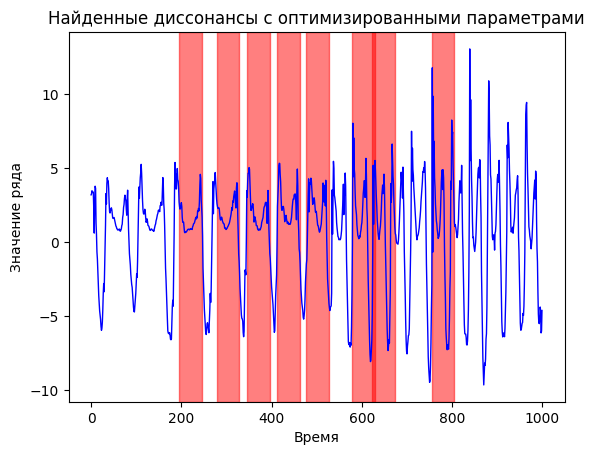

In [33]:
# INSERT YOUR CODE
import numpy as np
from stumpy import core
from modules.drag import find_candidates, DRAG, refine_candidates

# Инициализация параметров
T = walk_run  # Ваш временной ряд
m = 50
topK = 10     # Общее количество требуемых диссонансов
excl_zone = int(np.ceil(m / 4))  # Зона исключения для диссонансов
include = np.ones(len(T)-m+1, dtype=bool)

# Массивы для хранения найденных диссонансов и расстояний до ближайших соседей
dis_idx = -np.ones(topK)
dis_nnDist = -np.ones(topK)
dis_nn_idx = np.full(topK, -np.inf)

# Параметры начального шага
cound_find_dis = 2  # Уже найдено 2 диссонанса
r = dis_nnDist[cound_find_dis-1] * 0.99  # Новое значение порога
minL = m
maxL = int(m + np.ceil(m * 0.1))

# Поиск оставшихся диссонансов
while cound_find_dis < topK:
    result = DRAG(data=T, m=minL, r=r, include=include)
    for diss, nnDist, nn in zip(*result):
        dis_idx[cound_find_dis] = diss
        dis_nnDist[cound_find_dis] = nnDist
        dis_nn_idx[cound_find_dis] = nn

        # Исключаем ближайшие к найденному диссонансу подпоследовательности
        core.apply_exclusion_zone(include, diss, excl_zone, False)
        cound_find_dis += 1
        if cound_find_dis >= topK:
            break

    # Устанавливаем новое значение r, основанное на средних значениях предыдущих расстояний
    if cound_find_dis >= 5:
        recent_dists = dis_nnDist[cound_find_dis-5:cound_find_dis]
        mu = np.mean(recent_dists)
        sigma = np.std(recent_dists)
        r = mu - 2 * sigma
    else:
        # Если недостаточно диссонансов для вычисления средней и стандартной ошибки, используем 0.99 предыдущего
        r = dis_nnDist[cound_find_dis-1] * 0.99

    # Увеличиваем длину подпоследовательности для поиска следующих длин
    minL += int(np.ceil(m * 0.1))
    if minL > maxL:
        break  # Заканчиваем, если достигли максимальной длины

print("Найденные индексы диссонансов:", dis_idx)
print("Расстояния до ближайших соседей:", dis_nnDist)

# Визуализация
import matplotlib.pyplot as plt

plt.plot(T, color='blue', linewidth=1)
for diss in dis_idx:
    if diss != -1:
        plt.axvspan(diss, diss + m, color='red', alpha=0.5)
plt.title("Найденные диссонансы с оптимизированными параметрами")
plt.xlabel("Время")
plt.ylabel("Значение ряда")
plt.show()


Найдите диссонансы набора такси NY. Визуализируйте найденные диссонансы для обоих наборов данных, сравните с результатами остальных методов.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stumpy import core
from modules.drag import DRAG

# Параметры данных и директория
dataset_dir_path = '/content/drive/My Drive/2024-Golenishchev-TimeSeriesCourse-main/practice/03 Discords/datasets'
nyc_taxi = pd.read_csv(f"{dataset_dir_path}/nyc_taxi.csv", index_col=0).values[4000:8000, 0].astype(np.float64)

# Параметры поиска диссонансов
m = 50  # Длина подпоследовательности
topK = 10  # Число диссонансов для поиска
excl_zone = int(np.ceil(m / 4))  # Зона исключения

# Инициализация массивов для хранения
include_ny_taxi = np.ones(len(nyc_taxi) - m + 1, dtype=bool)
dis_idx_ny_taxi = -np.ones(topK)
dis_nnDist_ny_taxi = -np.ones(topK)
dis_nn_idx_ny_taxi = np.full(topK, -np.inf)

# Начальные значения для порога r и счетчика диссонансов
count_find_dis_ny = 0
r_ny = 2 * np.sqrt(m)

# Основной цикл поиска диссонансов
while count_find_dis_ny < topK:
    result = DRAG(data=nyc_taxi, m=m, r=r_ny, include=include_ny_taxi)
    for diss, nnDist, nn in zip(*result):
        if count_find_dis_ny >= topK:
            break
        dis_idx_ny_taxi[count_find_dis_ny] = diss
        dis_nnDist_ny_taxi[count_find_dis_ny] = nnDist
        dis_nn_idx_ny_taxi[count_find_dis_ny] = nn

        core.apply_exclusion_zone(include_ny_taxi, diss, excl_zone, False)
        count_find_dis_ny += 1

    # Пакетное обновление r для ускорения
    if count_find_dis_ny >= 5:
        recent_dists = dis_nnDist_ny_taxi[count_find_dis_ny - 5:count_find_dis_ny]
        r_ny = np.mean(recent_dists) - 2 * np.std(recent_dists)
    else:
        r_ny *= 0.98  # Медленное уменьшение, пока найдено меньше 5 диссонансов

print("Найденные индексы диссонансов такси NY:", dis_idx_ny_taxi)
print("Расстояния до ближайших соседей такси NY:", dis_nnDist_ny_taxi)

# Визуализация
plt.figure(figsize=(14, 6))
plt.plot(nyc_taxi, color='blue', label='Данные такси NY')
for diss in dis_idx_ny_taxi:
    if diss != -1:
        plt.axvspan(diss, diss + m, color='red', alpha=0.3)
plt.title("Найденные диссонансы в данных такси NY")
plt.xlabel("Время")
plt.ylabel("Значение ряда")
plt.legend()
plt.show()
